- Module Title: Machine Learning For AI
- Assessment Title: ML_CA1
- Lecturer Name: David McQuaid
- Student Full Name: Caroline de Sa Teixeira
- Student Number: 2020331
- Assessment Due Date: 25/03/2024
- Date of Submission: 22/04/2024

##### Github link: https://github.com/carolinedesat/ML_CA1

# 1. Libraries and Dataset

The following code will import all the necessary libraries and the log2.csv dataset.

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [261]:
df = pd.read_csv('log2.csv')

By displaying the first 10 rows, shape and info we can see that the dataset contains 12 columns (Source Port, Destination Port, NAT Source Port, NAT Destination Port, Bytes, Bytes Sent, Bytes Received, Packets, Elapsed Time (sec), pkts_sent, pkts_received and Action). Apart from the Action column which is of type object, all the other values are of type integer. We can also see that log2.csv contains a total of 65532 rows.

In [262]:
df.head(10)

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow
5,51465,443,39975,443,3961,1595,2366,21,16,12,9,allow
6,60513,47094,45469,47094,320,140,180,6,7,3,3,allow
7,50049,443,21285,443,7912,3269,4643,23,96,12,11,allow
8,52244,58774,2211,58774,70,70,0,1,5,1,0,allow
9,50627,443,16215,443,8256,1674,6582,31,75,15,16,allow


In [263]:
df.shape

(65532, 12)

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Bytes                 65532 non-null  int64 
 5   Bytes Sent            65532 non-null  int64 
 6   Bytes Received        65532 non-null  int64 
 7   Packets               65532 non-null  int64 
 8   Elapsed Time (sec)    65532 non-null  int64 
 9   pkts_sent             65532 non-null  int64 
 10  pkts_received         65532 non-null  int64 
 11  Action                65532 non-null  object
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


The nunique method displays all the unique values in each column, and by getting the sum of all the nulls we can see that we don't have any null values in the dataset.

In [265]:
df.nunique()

Source Port             22724
Destination Port         3273
NAT Source Port         29152
NAT Destination Port     2533
Bytes                   10724
Bytes Sent               6683
Bytes Received           8814
Packets                  1116
Elapsed Time (sec)        915
pkts_sent                 749
pkts_received             922
Action                      4
dtype: int64

In [266]:
df.isnull().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
Action                  0
dtype: int64

# 1. EDA
##### Perform an initial analysis of the data (EDA) using python in your Jupyter notebook. Discuss your findings and what relevance they might have on your planned classification algorithms. [0-20]

In [267]:
df.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


##### The following plot indicates that the number of "allow" actions is significantly higher compared to "drop", "deny" and "reset-both" actions.

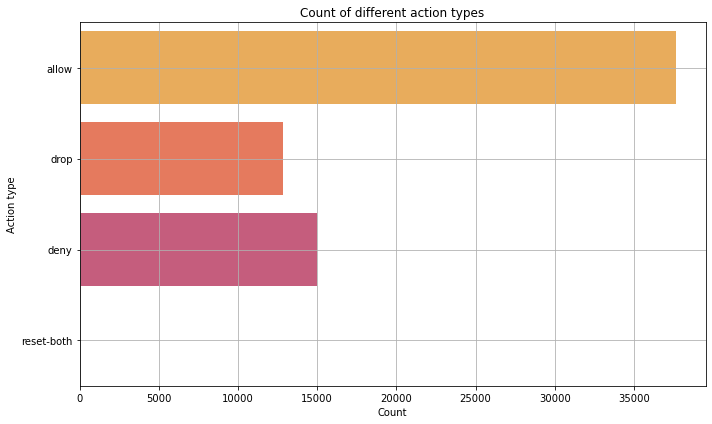

In [268]:
palette = ["#FFAF45", "#FB6D48", "#D74B76", "#673F69"]
plt.figure(figsize=(10, 6))

sns.countplot(data=df, y='Action', palette=palette)
plt.title('Count of different action types')
plt.ylabel('Action type')
plt.xlabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

In [269]:
df['Action'].value_counts()

allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64

##### The code below reveals that 28432 out of the 65532 rows contain the same NAT address for both the source and destination ports. When comparing with the code above, we can see that in ALL cases where the NAT source and destination are the same, it indicates that a denied and/or dropped packet was returned from the gate and sent back to its origin, so that explains why only 564 rows belong to the "allow" action. 

In [270]:
nat_allow = len(df[(df['NAT Source Port'] == df['NAT Destination Port']) & (df['Action'] == 'allow')])
nat_deny = len(df[(df['NAT Source Port'] == df['NAT Destination Port']) & (df['Action'] == 'deny')])
nat_drop = len(df[(df['NAT Source Port'] == df['NAT Destination Port']) & (df['Action'] == 'drop')])
nat_reset_both = len(df[(df['NAT Source Port'] == df['NAT Destination Port']) & (df['Action'] == 'reset-both')])

print("Allow: ", nat_allow)
print("Deny: ", nat_deny)
print("Drop: ", nat_drop)
print("Reset-both: ", nat_reset_both)

Allow:  564
Deny:  14975
Drop:  12851
Reset-both:  42


This plot illustrates the difference between "deny", "drop", "allow" and "reset-both" actions, revealing a significant contrast when compared to the first plot, where "allow" actions constitute the majority when analyzing the entire dataset.

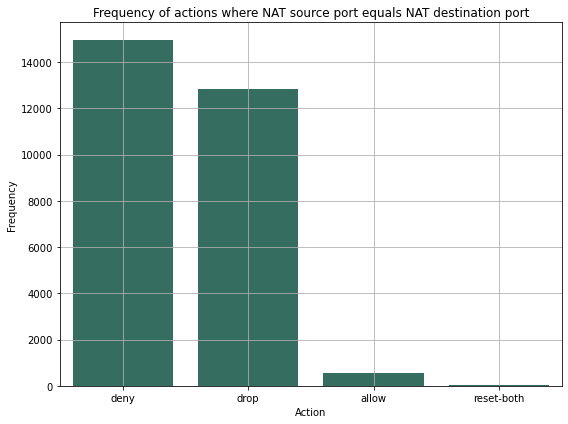

In [271]:
same_ports = df[df['NAT Source Port'] == df['NAT Destination Port']]
unique_actions = same_ports['Action'].value_counts()
plt.figure(figsize=(8, 6))

sns.barplot(x=unique_actions.index, y=unique_actions.values, color='#2C7865')
plt.xlabel('Action')
plt.ylabel('Frequency')
plt.title('Frequency of actions where NAT source port equals NAT destination port')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Data Preparation
##### Perform any preparation of the data, that you feel is necessary, using python in your Jupyter notebook. Explain your rationale behind your data preparation and how it will assist you.[0-30]

# 3. Classification Algorithms
#####  Create and implement at least 2 classification algorithms that will output a classification based on the Country: (class attribute) feature. Test these models and try to improve it as you see fit. Discuss your findings and final rational for choosing a particular classification algorithm.[0-40]

# 4. Test Data
##### Make a classification using your test data, using your final classification algorithm and comment on the accuracy differential between the training and testing set.[0-10]